# Association Rules

- Association Rules Analysis has become familiar for analysis in the retail industry. It is also called Market Basket Analysis terms. This analysis is also used for advice. Personal recommendations in applications such as Spotify, Netflix, and Youtube can be given as examples. 

- Association Rules are derived to understand which products go together.

- Once we get these types of association rules between various products, we can solve multiple business problem statements such as:
    1. Products to stock
    2. Promotion on various products
    3. Implementing strategies to arrange the products in store.
    4. Giving extra offers on products which are not getting sold.
    5. Building strategies to improve the customer feedbacks.
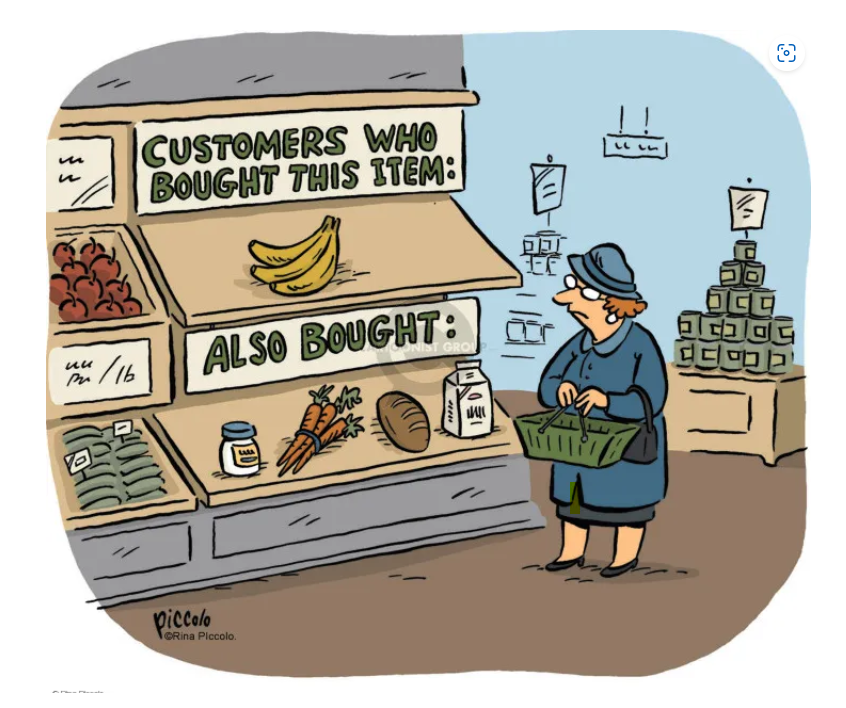

# Apriori Algorithm

- The Apriori Algorithm, used for the first phase of the Association Rules, is the most popular and classical algorithm in the frequent old parts.
- Apriori algorithm is a classical approach to find frequent patterns and highly related products.
- The goal is to find combinations of products that are often bought together, which we call frequent itemsets. The technical term for the domain is Frequent Itemset Mining.

**The importance of Association rule is determined by three metrics:**

**1.Support:This measure gives an idea of how frequent an itemset is in all the transactions.**
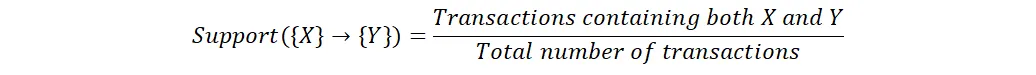

**2.Confidence: This measure defines the likeliness of occurrence of consequent on the cart given that the cart already has the antecedents.**
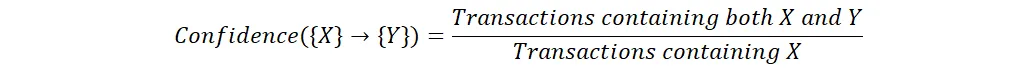
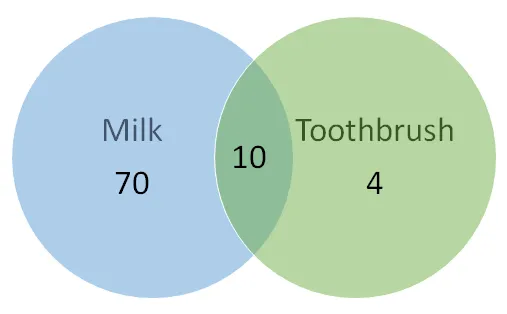
Total transactions = 100. 10 of them have both milk and toothbrush, 70 have milk but no toothbrush and 4 have toothbrush but no milk.
-  Confidence for {Toothbrush} → {Milk} will be 10/(10+4) = 0.7
- Looks like a high confidence value. But we know intuitively that these two products have a weak association and there is something misleading about this high confidence value. Lift is introduced to overcome this challenge.

**3. Lift: Lift tells you how strong the association rule is.**

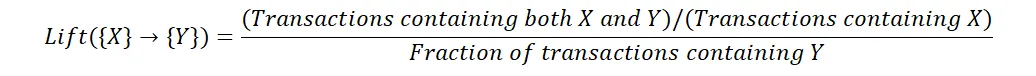

- Lift : (10/4)/70 = 0.035

**4. Leverage: With and without item A is in the transaction, mow much it affect item B?** 
- Leverage computes the probability of A and B occurring together and the frequency that would be expected if A and B were independent.
- Leverage is similar to lift but easier to interpret since it ranges from -1 to 1 while lift ranges from 0 to infinity.
- A leverage value of 0 indicates independence.
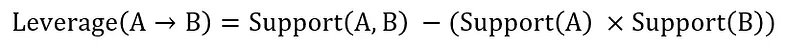

**5. Conviction: Conviction helps to judge if the rule happened to be there by chance or not.**
- A high conviction value means that the consequent is highly dependent on the antecedent (A). It can be interpreted as lift.
- If items are independent, the conviction is 1.
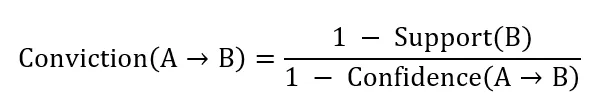

**STEPS INVOLVED IN APRIORI ALGORITHM:**
1. Compute the support value for each item:
    - The support is simply the number of transactions in which a specific product (or combination of products) occurs.
2. Deciding the support threshold
    - Selection of support threshold depends on domain knowledge and the dataset.
3. Selecting the one item set based on the support value.
4. Selecting two item set:
    - The next step is to do the same analysis, but now using pairs of products instead of individual products.
5. Repeat the same step for larger sets.
6. Generate association rule and calculate confidence.
7. Compute lift ratio.

In [6]:
#Install required library
!pip install mlxtend

In [7]:
#Import Libraries
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import association_rules,apriori

In [3]:
#Load the titanic dataset

In [8]:
df = pd.read_csv('Titanic.csv')
df

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


In [10]:
data = pd.get_dummies(df)
data

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
2196,0,0,0,1,1,0,1,0,0,1
2197,0,0,0,1,1,0,1,0,0,1
2198,0,0,0,1,1,0,1,0,0,1
2199,0,0,0,1,1,0,1,0,0,1


In [14]:
#Build apriori algorithm
scores = apriori(data, min_support=0.2,use_colnames=True)
scores

,support,itemsets
0,0.320763,(Class_3rd)
1,0.402090,(Class_Crew)
2,0.213539,(Gender_Female)
3,0.786461,(Gender_Male)
4,0.950477,(Age_Adult)
5,0.676965,(Survived_No)
6,0.323035,(Survived_Yes)
7,0.231713,"(Class_3rd, Gender_Male)"
8,0.284871,"(Class_3rd, Age_Adult)"
9,0.239891,"(Survived_No, Class_3rd)"


In [15]:
#Building association rule
association_rules(scores)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Class_3rd),(Age_Adult),0.320763,0.950477,0.284871,0.888102,0.934375,-0.020008,0.442572
1,(Class_Crew),(Gender_Male),0.402090,0.786461,0.391640,0.974011,1.238474,0.075412,8.216621
2,(Class_Crew),(Age_Adult),0.402090,0.950477,0.402090,1.000000,1.052103,0.019913,inf
3,(Gender_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,0.009870,1.339441
4,(Survived_No),(Gender_Male),0.676965,0.786461,0.619718,0.915436,1.163995,0.087312,2.525187
5,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,0.009900,1.419023
6,(Survived_Yes),(Age_Adult),0.323035,0.950477,0.297138,0.919831,0.967757,-0.009900,0.617734
7,"(Class_3rd, Gender_Male)",(Age_Adult),0.231713,0.950477,0.209905,0.905882,0.953082,-0.010333,0.526181
8,"(Survived_No, Class_3rd)",(Age_Adult),0.239891,0.950477,0.216265,0.901515,0.948487,-0.011746,0.502848
9,"(Class_Crew, Age_Adult)",(Gender_Male),0.402090,0.786461,0.391640,0.974011,1.238474,0.075412,8.216621


# Supermarket

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Supermarket.csv',
                index_col=0)
df

,Products
ID,
1,"Milk,Bread,sauce"
2,"Milk,Tea powder,Bread"
3,"Bread,Jam,Butter"
4,"Bread,Butter"
5,"Maggie,Sauce"
6,"Maggie,Cheese,Sauce"
7,"Maggie,Cheese,Sauce"
8,"Peanut butter,Bread"
9,"Coffee,Sugar,Milk"


In [19]:
df.iloc[[0]]

,Products
ID,
1,"Milk,Bread,sauce"


In [21]:
text = 'Milk,Bread,sauce'
text

'Milk,Bread,sauce'

In [22]:
text.split(',')

['Milk', 'Bread', 'sauce']

In [25]:
for i in df['Products']:
    print(i.split(','))

['Milk', 'Bread', 'sauce']
['Milk', 'Tea powder', 'Bread']
['Bread', 'Jam', 'Butter']
['Bread', 'Butter']
['Maggie', 'Sauce']
['Maggie', 'Cheese', 'Sauce']
['Maggie', 'Cheese', 'Sauce']
['Peanut butter', 'Bread']
['Coffee', 'Sugar', 'Milk']
['Coffee', 'Milk']
['Maggie', 'Cheese', 'Sauce']
['Bread', 'Jam', 'Butter']
['Butter', 'Cheese']
['Maggie', 'Cheese', 'Sauce']
['Maggie', 'Bread ']
['Bread', 'Torch', 'Jam']
['Bread', 'Jam', 'Butter']
['Jam', 'Butter', 'Torch']
['Bread', 'Jam', 'Butter']
['CornFlakes', 'Milk', 'Bread']


In [26]:
def txt_split(txt):
    return txt.split(',')

In [27]:
df['Products'].apply(txt_split)

ID
1          [Milk, Bread, sauce]
2     [Milk, Tea powder, Bread]
3          [Bread, Jam, Butter]
4               [Bread, Butter]
5               [Maggie, Sauce]
6       [Maggie, Cheese, Sauce]
7       [Maggie, Cheese, Sauce]
8        [Peanut butter, Bread]
9         [Coffee, Sugar, Milk]
10               [Coffee, Milk]
11      [Maggie, Cheese, Sauce]
12         [Bread, Jam, Butter]
13             [Butter, Cheese]
14      [Maggie, Cheese, Sauce]
15             [Maggie, Bread ]
16          [Bread, Torch, Jam]
17         [Bread, Jam, Butter]
18         [Jam, Butter, Torch]
19         [Bread, Jam, Butter]
20    [CornFlakes, Milk, Bread]
Name: Products, dtype: object

In [29]:
#List comprehension

data = [i.split(',') for i in df['Products']]
data

[['Milk', 'Bread', 'sauce'],
 ['Milk', 'Tea powder', 'Bread'],
 ['Bread', 'Jam', 'Butter'],
 ['Bread', 'Butter'],
 ['Maggie', 'Sauce'],
 ['Maggie', 'Cheese', 'Sauce'],
 ['Maggie', 'Cheese', 'Sauce'],
 ['Peanut butter', 'Bread'],
 ['Coffee', 'Sugar', 'Milk'],
 ['Coffee', 'Milk'],
 ['Maggie', 'Cheese', 'Sauce'],
 ['Bread', 'Jam', 'Butter'],
 ['Butter', 'Cheese'],
 ['Maggie', 'Cheese', 'Sauce'],
 ['Maggie', 'Bread '],
 ['Bread', 'Torch', 'Jam'],
 ['Bread', 'Jam', 'Butter'],
 ['Jam', 'Butter', 'Torch'],
 ['Bread', 'Jam', 'Butter'],
 ['CornFlakes', 'Milk', 'Bread']]

In [30]:
from mlxtend.preprocessing import TransactionEncoder

In [32]:
te = TransactionEncoder()
encoded_df = te.fit_transform(data)

In [34]:
te.columns_

['Bread',
 'Bread ',
 'Butter',
 'Cheese',
 'Coffee',
 'CornFlakes',
 'Jam',
 'Maggie',
 'Milk',
 'Peanut butter',
 'Sauce',
 'Sugar',
 'Tea powder',
 'Torch',
 'sauce']

In [35]:
data = pd.DataFrame(encoded_df,columns=te.columns_)
data

,Bread,Bread,Butter,Cheese,Coffee,CornFlakes,Jam,Maggie,Milk,Peanut butter,Sauce,Sugar,Tea powder,Torch,sauce
0,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False
2,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False
3,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
5,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False
6,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False
7,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
8,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False
9,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False


In [37]:
data.replace(True,1,inplace=True)
data.replace(False,0,inplace=True)
data

,Bread,Bread,Butter,Cheese,Coffee,CornFlakes,Jam,Maggie,Milk,Peanut butter,Sauce,Sugar,Tea powder,Torch,sauce
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
5,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
6,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
7,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
9,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [38]:
scores = apriori(data,min_support=0.2,use_colnames=True)

In [39]:
scores

,support,itemsets
0,0.50,(Bread)
1,0.35,(Butter)
2,0.25,(Cheese)
3,0.30,(Jam)
4,0.30,(Maggie)
5,0.25,(Milk)
6,0.25,(Sauce)
7,0.25,"(Butter, Bread)"
8,0.25,"(Jam, Bread)"
9,0.25,"(Butter, Jam)"


In [40]:
association_rules(scores)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Jam),(Bread),0.30,0.50,0.25,0.833333,1.666667,0.1000,3.00
1,(Jam),(Butter),0.30,0.35,0.25,0.833333,2.380952,0.1450,3.90
2,(Cheese),(Maggie),0.25,0.30,0.20,0.800000,2.666667,0.1250,3.50
3,(Cheese),(Sauce),0.25,0.25,0.20,0.800000,3.200000,0.1375,3.75
4,(Sauce),(Cheese),0.25,0.25,0.20,0.800000,3.200000,0.1375,3.75
5,(Sauce),(Maggie),0.25,0.30,0.25,1.000000,3.333333,0.1750,inf
6,(Maggie),(Sauce),0.30,0.25,0.25,0.833333,3.333333,0.1750,4.50
7,"(Butter, Jam)",(Bread),0.25,0.50,0.20,0.800000,1.600000,0.0750,2.50
8,"(Butter, Bread)",(Jam),0.25,0.30,0.20,0.800000,2.666667,0.1250,3.50
9,"(Jam, Bread)",(Butter),0.25,0.35,0.20,0.800000,2.285714,0.1125,3.25
